In [9]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plts

In [10]:
# File paths
image_file = "path/CT.nrrd"
mask_file = "path/maks.nrrd"

# Load the image and mask
image = sitk.ReadImage(image_file)
mask = sitk.ReadImage(mask_file)

# Convert to numpy arrays
image_array = sitk.GetArrayFromImage(image)  # Shape: [z, y, x]
mask_array = sitk.GetArrayFromImage(mask)    # Shape: [z, y, x]


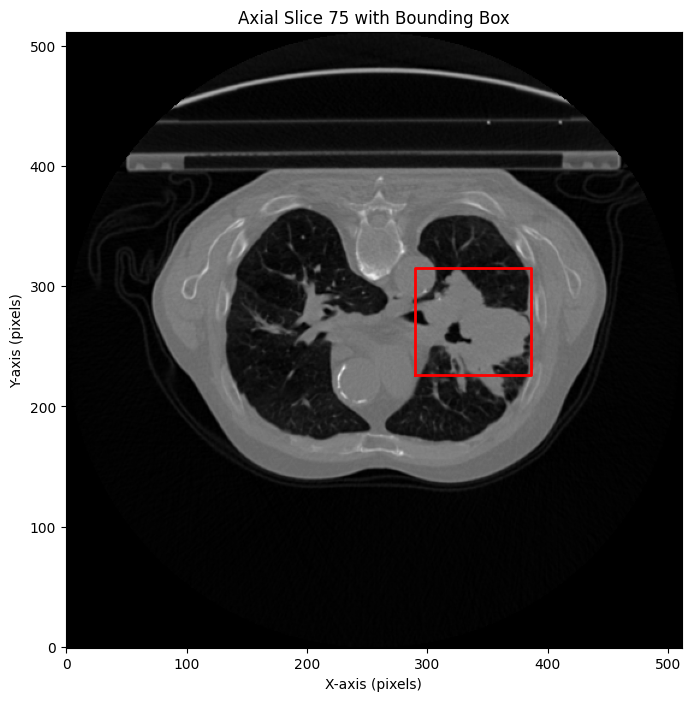

Voxel sizes (x, y, z): 96 89 20
Physical sizes (x, y, z): 93.75 86.9140625 60.0


In [11]:
# Step 2: Compute the bounding box for the mask
bb_filter = sitk.LabelStatisticsImageFilter()
bb_filter.Execute(image, mask)
current_bb = bb_filter.GetBoundingBox(1)  # Get bounding box for label 1

# Step 3: Extract voxel dimensions
x_min, x_max = current_bb[0], current_bb[1]
y_min, y_max = current_bb[2], current_bb[3]
z_min, z_max = current_bb[4], current_bb[5]

# Step 4: Visualize an axial slice with the bounding box
# Convert the image to a numpy array
image_array = sitk.GetArrayFromImage(image)
spacing = image.GetSpacing()
origin = image.GetOrigin()

# Choose an axial slice within the bounding box's Z range
slice_index = int((z_min + z_max) / 2)  # Midpoint slice
slice_image = image_array[slice_index, :, :]

# Plot the axial slice with bounding box overlay
plt.figure(figsize=(8, 8))
plt.imshow(slice_image, cmap="gray", origin="lower")

# Compute bounding box coordinates in slice (x, y plane)
x_min_px, x_max_px = x_min, x_max
y_min_px, y_max_px = y_min, y_max

# Draw the bounding box
plt.plot([x_min_px, x_max_px, x_max_px, x_min_px, x_min_px],
         [y_min_px, y_min_px, y_max_px, y_max_px, y_min_px],
         color="red", linewidth=2)

# Add labels and show the plot
plt.title(f"Axial Slice {slice_index} with Bounding Box")
plt.xlabel("X-axis (pixels)")
plt.ylabel("Y-axis (pixels)")
plt.show()

# Step 5: Print the results
x_size_voxel = x_max - x_min
y_size_voxel = y_max - y_min
z_size_voxel = z_max - z_min

x_size_physical = x_size_voxel * spacing[0]
y_size_physical = y_size_voxel * spacing[1]
z_size_physical = z_size_voxel * spacing[2]

print("Voxel sizes (x, y, z):", x_size_voxel, y_size_voxel, z_size_voxel)
print("Physical sizes (x, y, z):", x_size_physical, y_size_physical, z_size_physical)


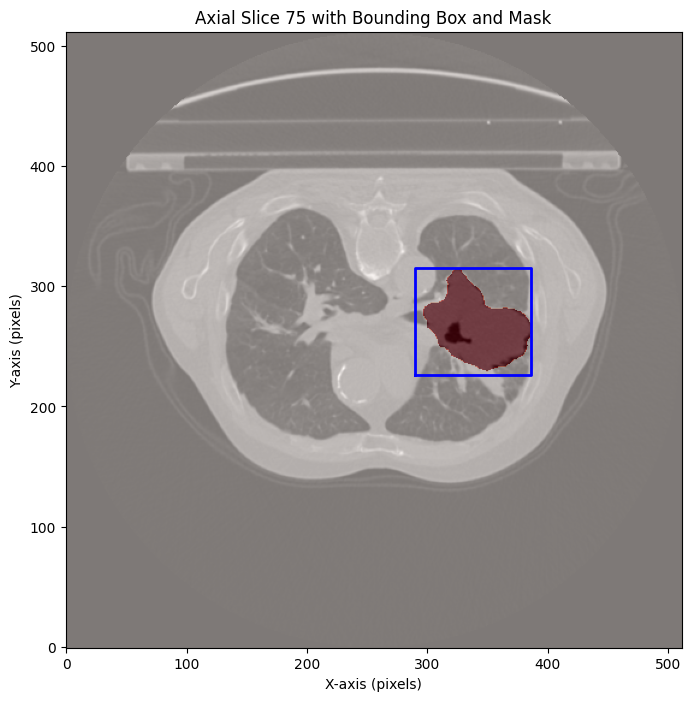

Voxel sizes (x, y, z): 96 89 20
Physical sizes (x, y, z): 93.75 86.9140625 60.0


In [12]:




# Step 2: Compute the bounding box for the mask
bb_filter = sitk.LabelStatisticsImageFilter()
bb_filter.Execute(image, mask)
current_bb = bb_filter.GetBoundingBox(1)  # Get bounding box for label 1

# Step 3: Extract voxel dimensions
x_min, x_max = current_bb[0], current_bb[1]
y_min, y_max = current_bb[2], current_bb[3]
z_min, z_max = current_bb[4], current_bb[5]

# Step 4: Visualize an axial slice with the bounding box and mask overlay
# Convert the image and mask to numpy arrays
image_array = sitk.GetArrayFromImage(image)
mask_array = sitk.GetArrayFromImage(mask)
spacing = image.GetSpacing()
origin = image.GetOrigin()

# Choose an axial slice within the bounding box's Z range
slice_index = int((z_min + z_max) / 2)  # Midpoint slice
slice_image = image_array[slice_index, :, :]
slice_mask = mask_array[slice_index, :, :]

# Plot the axial slice with bounding box and mask overlay
plt.figure(figsize=(8, 8))
plt.imshow(slice_image, cmap="gray", origin="lower")

# Overlay the mask in a semi-transparent red color
plt.imshow(slice_mask, cmap="Reds", alpha=0.5, origin="lower")

# Compute bounding box coordinates in slice (x, y plane)
x_min_px, x_max_px = x_min, x_max
y_min_px, y_max_px = y_min, y_max

# Draw the bounding box
plt.plot([x_min_px, x_max_px, x_max_px, x_min_px, x_min_px],
         [y_min_px, y_min_px, y_max_px, y_max_px, y_min_px],
         color="blue", linewidth=2)

# Add labels and show the plot
plt.title(f"Axial Slice {slice_index} with Bounding Box and Mask")
plt.xlabel("X-axis (pixels)")
plt.ylabel("Y-axis (pixels)")
plt.show()

# Step 5: Print the results
x_size_voxel = x_max - x_min
y_size_voxel = y_max - y_min
z_size_voxel = z_max - z_min

x_size_physical = x_size_voxel * spacing[0]
y_size_physical = y_size_voxel * spacing[1]
z_size_physical = z_size_voxel * spacing[2]

print("Voxel sizes (x, y, z):", x_size_voxel, y_size_voxel, z_size_voxel)
print("Physical sizes (x, y, z):", x_size_physical, y_size_physical, z_size_physical)
